### Lead Scoring Case Study 

- Supervised Learning Algorithm - Logistic Regression [ Classification ]
- Programming Language - Python
- Developed by UV, VK, VY


#### Data Preprocessing

In [114]:
# import all libraries numpy, pandas, matplotlib, seaborn. 
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline

# Set custom display properties in pandas
pd.set_option("display.max_rows", 900)
pd.set_option("display.max_columns", 900) 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [115]:
# To distinguish numerical columns either as categorical/discrete or non categorical and return as dict
def classify_feature_dtype(df,cols):
    d_categories = {'int_cat': [], "float_ts":[] }
    for col in cols:
        if (len(df[col].unique()) < 20):
            d_categories['int_cat'].append(col)
        else:
            d_categories['float_ts'].append(col)
    return d_categories

# Print all statistical information for a given set of columns
def show_stats(df, cols):
    for col in list(cols):
        print("Total Nulls: {0},\nMode: {1}".format(df[col].isna().sum(), df[col].mode()[0]))
        if len(df[col].unique()) < 50:
            print("\nUnique: {0}\n".format(df[col].unique()))
        if (df[col].dtype == int) or (df[col].dtype == float):
            print("Median   : {0}, \nVariance: {1}, \n\nDescribe: {2} \n".format(df[col].median(), df[col].var(), df[col].describe()))
        print("ValueCounts: {0} \n\n\n".format((df[col].value_counts(normalize=True) * 100).head(5)))
        print("------------------------------------------------------------------")

# Return the percentage of null values in each columns in a dataframe
def check_cols_null_pct(df):
    df_non_na = df.count() / len(df)  # Ratio of non null values
    df_na_pct = (1 - df_non_na) * 100 # Find the Percentage of null values
    return df_na_pct.sort_values(ascending=False) # Sort the resulting values in descending order

# Generates charts based on the data type of the cols, as part of the univariate analysis 
# it takes dataframe, columns, train data 0,1, and feature type as args.
def univariate_plots(df, cols, target=None, ftype=None, l_dict = None):
    for col in cols:
        #generate plots and graphs for category type. (generates piechart, countplot, boxplot / if training data is provided it generates bar chart instead)
        if ftype == "categorical":
            fig, axs = plt.subplots(1, 3, figsize=(20, 6))
                        
            col_idx = 0
            axs[col_idx].pie(x=df[col].value_counts().head(15), labels=df[col].value_counts().head(15).index.str[:15], autopct="%1.1f%%", 
                    radius=1, textprops={"fontsize": 10, "color": "Black"}, startangle=90, rotatelabels=False)
            axs[col_idx].set_title("PieChart of {0}".format(col), y=1); plt.xticks(rotation=45); plt.ylabel("Percentage")
            fig.subplots_adjust(wspace=0.5, hspace=0.3)
            
            col_idx += 1
            sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis",  ax=axs[col_idx])
            if (l_dict is not None) and (l_dict.get(col) is not None):
                axs[col_idx].legend([ f'{k} - {v}' for k,v in l_dict[col].items()])
            axs[col_idx].set_title("Countplot of {0}".format(col)); plt.xticks(rotation=45); plt.xlabel(col); plt.ylabel("Count")
            fig.subplots_adjust(wspace=0.5, hspace=0.3)

            col_idx += 1
            ax = sns.barplot(data=df, x=df[col].str[:15], y=target, palette="viridis",  ax=axs[col_idx], errwidth=0)
            for i in ax.containers:
                ax.bar_label(i,)
            axs[col_idx].set_title('Barplot against target'); plt.xticks(rotation=45); plt.xlabel(col)
            fig.subplots_adjust(wspace=0.5, hspace=0.3)

            plt.suptitle("Univariate analysis of {0}".format(col), fontsize=12, y=0.95)
            plt.tight_layout()
            plt.subplots_adjust(top=0.85)
            plt.show()
            plt.clf()

        #generate plots and graphs for numerical types. (generates boxplot, histplot, kdeplot, scatterplot)
        elif ftype == "non_categorical":        
            fig, axs = plt.subplots(1, 4, figsize=(20, 6))
            
            col_idx = 0
            
            sns.boxplot(data=df, y=col, palette="viridis", flierprops=dict( marker="o", markersize=6, markerfacecolor="red", markeredgecolor="black"),
                        medianprops=dict(linestyle="-", linewidth=3, color="#FF9900"), whiskerprops=dict(linestyle="-", linewidth=2, color="black"),
                        capprops=dict(linestyle="-", linewidth=2, color="black"), ax=axs[col_idx])
            axs[col_idx].set_title("Boxplot of {0}".format(col)); plt.xticks(rotation=45); plt.xlabel(col)
            fig.subplots_adjust(wspace=0.5, hspace=0.3)
            
            col_idx += 1

            axs[col_idx].hist(data=df, x=col, label=col)
            axs[col_idx].set_title("Histogram of {0}".format(col)); plt.xticks(rotation=45); plt.xlabel(col)
            fig.subplots_adjust(wspace=0.5, hspace=0.3)
            
            col_idx += 1

            sns.kdeplot(df[col], shade=True, ax=axs[col_idx])
            axs[col_idx].set_title("KDE plot of {0}".format(col)); plt.xticks(rotation=45); plt.xlabel(col)
            fig.subplots_adjust(wspace=0.5, hspace=0.3)
            
            col_idx += 1

            sns.scatterplot(df[col], ax=axs[col_idx])
            axs[col_idx].set_title("Scatterplot of {0}".format(col)); plt.xticks(rotation=45); plt.xlabel(col)
            fig.subplots_adjust(wspace=0.5, hspace=0.3)

            plt.suptitle("Univariate analysis of {0}".format(col), fontsize=12, y=0.95)
            plt.tight_layout()
            plt.subplots_adjust(top=0.85)
            plt.show()
            plt.clf()

# Perform Outlier analysis on the given dataframe.
# Find Lower threshold, Upper threshold and IQR values. 
# Return the Result as a dataframe. 
# find_outlier = True argument: restricts the output df to outlier columns. whereas find_outlier = False: returns results for all columns
def get_extremeval_threshld(df, find_outlier=False):
    outlier_df = pd.DataFrame(columns=[i for i in df.columns if find_outlier == True], data=None)
    
    for col in df.columns:
        thirdq, firstq = df[col].quantile(0.75), df[col].quantile(0.25)
        iqr = 1.5 * (thirdq - firstq)
        extvalhigh, extvallow = iqr + thirdq, firstq - iqr
        
        if find_outlier == True:
            dfout = df.loc[(df[col] > extvalhigh) | (df[col] < extvallow)]
            dfout = dfout.assign(name=col, thresh_low=extvallow, thresh_high=extvalhigh)
        else:
            dfout = pd.DataFrame([[col, extvallow, extvalhigh]], columns=['name', 'thresh_low', 'thresh_high'])
            
        outlier_df = pd.concat([outlier_df, dfout])
    # outlier_df = outlier_df.reset_index(drop=True)
    outlier_df = outlier_df.set_index('name',drop=True)
    return outlier_df

In [116]:
lead_score_df = pd.read_csv('Leads.csv')
lead_score_df.head(1)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.000,0,0.000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.000,15.000,No,No,Modified


In [117]:
#duplicates row validation by id cols
print(f"{lead_score_df.index.is_unique}, {lead_score_df.columns.is_unique}, {lead_score_df['Prospect ID'].is_unique}, {lead_score_df['Lead Number'].is_unique}")

True, True, True, True


In [118]:
#drop unnecessary columns
lead_score_df = lead_score_df.drop(columns=['Prospect ID', 'I agree to pay the amount through cheque', 'Last Notable Activity'])

In [119]:
#rename columns that are too long
lead_score_df = lead_score_df.rename(columns={'Total Time Spent on Website':'ttime_on_site', 'Page Views Per Visit':'pg_view_pv', 'How did you hear about X Education':'info_abt_X_Edu', 'What is your current occupation':'curr_occupation',
    'What matters most to you in choosing a course':'reason_behind_course', 'Receive More Updates About Our Courses':'more_course_updates', 'Update me on Supply Chain Content':'supply_chain_info', 'Get updates on DM Content':'get_dm',
    'Asymmetrique Activity Index':'asym_activ_idx', 'Asymmetrique Profile Index':'asym_prof_idx', 'Asymmetrique Activity Score':'asym_activ_score', 'Asymmetrique Profile Score':'asym_prof_score',
    'A free copy of Mastering The Interview':'avail_free_copy'})

In [120]:
# replace unnecessary space in columns with underscore and covert it to lower case
lead_score_df.columns = lead_score_df.columns.str.replace(pat=' ',repl='_', regex=True)
lead_score_df.columns = lead_score_df.columns.str.lower()

In [121]:
lead_score_df.head(1)
lead_score_df.dtypes
print(f'{lead_score_df.shape}, {lead_score_df.size}')

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,ttime_on_site,pg_view_pv,last_activity,country,specialization,info_abt_x_edu,curr_occupation,reason_behind_course,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,more_course_updates,tags,lead_quality,supply_chain_info,get_dm,lead_profile,city,asym_activ_idx,asym_prof_idx,asym_activ_score,asym_prof_score,avail_free_copy
0,660737,API,Olark Chat,No,No,0,0.000,0,0.000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.000,15.000,No


lead_number                  int64
lead_origin                 object
lead_source                 object
do_not_email                object
do_not_call                 object
converted                    int64
totalvisits                float64
ttime_on_site                int64
pg_view_pv                 float64
last_activity               object
country                     object
specialization              object
info_abt_x_edu              object
curr_occupation             object
reason_behind_course        object
search                      object
magazine                    object
newspaper_article           object
x_education_forums          object
newspaper                   object
digital_advertisement       object
through_recommendations     object
more_course_updates         object
tags                        object
lead_quality                object
supply_chain_info           object
get_dm                      object
lead_profile                object
city                

(9240, 34), 314160


In [122]:
#check null val percentage
check_cols_null_pct(lead_score_df)

lead_quality              51.591
asym_prof_score           45.649
asym_activ_score          45.649
asym_prof_idx             45.649
asym_activ_idx            45.649
tags                      36.288
lead_profile              29.318
reason_behind_course      29.318
curr_occupation           29.113
country                   26.634
info_abt_x_edu            23.885
specialization            15.563
city                      15.368
pg_view_pv                 1.483
totalvisits                1.483
last_activity              1.115
lead_source                0.390
more_course_updates        0.000
get_dm                     0.000
supply_chain_info          0.000
lead_number                0.000
newspaper_article          0.000
through_recommendations    0.000
digital_advertisement      0.000
newspaper                  0.000
x_education_forums         0.000
lead_origin                0.000
magazine                   0.000
search                     0.000
ttime_on_site              0.000
converted 

In [123]:
#replace select string with nan
lead_score_df = lead_score_df.replace(to_replace=['select','Select'], value=np.nan)

# validate select str is replaced
[i for i in lead_score_df.columns if 'select' in (lead_score_df[i].astype(str).str.lower()).str.findall('select').value_counts().index.map(''.join).to_list()]

[]

In [124]:
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_constant_features

constant_features = get_constant_features(lead_score_df)
constant_features.head(10)
"','".join(constant_features['Var'].to_list())

,Desc,Var,Value,Perc
0,Constant,magazine,No,100.000
1,Constant,more_course_updates,No,100.000
2,Constant,supply_chain_info,No,100.000
3,Constant,get_dm,No,100.000
4,Quasi Constant,x_education_forums,No,99.989
5,Quasi Constant,newspaper,No,99.989
6,Quasi Constant,do_not_call,No,99.978
7,Quasi Constant,newspaper_article,No,99.978
8,Quasi Constant,digital_advertisement,No,99.957
9,Quasi Constant,through_recommendations,No,99.924


"magazine','more_course_updates','supply_chain_info','get_dm','x_education_forums','newspaper','do_not_call','newspaper_article','digital_advertisement','through_recommendations','search"

In [125]:
# drop all the constant_features
lead_score_df = lead_score_df.drop(['magazine','more_course_updates','supply_chain_info','get_dm','x_education_forums','newspaper','do_not_call','newspaper_article','digital_advertisement','through_recommendations','search'],axis=1)

In [126]:
#convert dtypes 
obj_cols = lead_score_df.select_dtypes(include=object).columns
lead_score_df[obj_cols] = lead_score_df[obj_cols].astype(dtype='category')

In [127]:
#check null val percentage
null_pct = 100 * lead_score_df.isna().sum()/len(lead_score_df)
null_pct
lead_score_df = lead_score_df.drop(null_pct[null_pct > 40].index, axis=1)

lead_number             0.000
lead_origin             0.000
lead_source             0.390
do_not_email            0.000
converted               0.000
totalvisits             1.483
ttime_on_site           0.000
pg_view_pv              1.483
last_activity           1.115
country                26.634
specialization         36.580
info_abt_x_edu         78.463
curr_occupation        29.113
reason_behind_course   29.318
tags                   36.288
lead_quality           51.591
lead_profile           74.188
city                   39.708
asym_activ_idx         45.649
asym_prof_idx          45.649
asym_activ_score       45.649
asym_prof_score        45.649
avail_free_copy         0.000
dtype: float64

In [128]:
null_pct = check_cols_null_pct(lead_score_df)
null_pct
na_cols = null_pct[null_pct > 0].index
na_cols

city                   39.708
specialization         36.580
tags                   36.288
reason_behind_course   29.318
curr_occupation        29.113
country                26.634
totalvisits             1.483
pg_view_pv              1.483
last_activity           1.115
lead_source             0.390
lead_number             0.000
lead_origin             0.000
do_not_email            0.000
converted               0.000
ttime_on_site           0.000
avail_free_copy         0.000
dtype: float64

Index(['city', 'specialization', 'tags', 'reason_behind_course',
       'curr_occupation', 'country', 'totalvisits', 'pg_view_pv',
       'last_activity', 'lead_source'],
      dtype='object')

In [129]:
lead_score_df.describe(include=np.number)
lead_score_df.describe(exclude=np.number)

,lead_number,converted,totalvisits,ttime_on_site,pg_view_pv
count,9240.000,9240.000,9103.000,9240.000,9103.000
mean,617188.436,0.385,3.445,487.698,2.363
std,23405.996,0.487,4.855,548.021,2.161
min,579533.000,0.000,0.000,0.000,0.000
25%,596484.500,0.000,1.000,12.000,1.000
50%,615479.000,0.000,3.000,248.000,2.000
75%,637387.250,1.000,5.000,936.000,3.000
max,660737.000,1.000,251.000,2272.000,55.000


,lead_origin,lead_source,do_not_email,last_activity,country,specialization,curr_occupation,reason_behind_course,tags,city,avail_free_copy
count,9240,9204,9240,9137,6779,5860,6550,6531,5887,5571,9240
unique,5,21,2,17,38,18,6,3,26,6,2
top,Landing Page Submission,Google,No,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,No
freq,4886,2868,8506,3437,6492,976,5600,6528,2072,3222,6352


In [130]:
# impute missing categorical values using mode, if a particular value in that column has higher frequency say > 50%
for i in lead_score_df.select_dtypes(include='category'):
    temp = lead_score_df[i].value_counts(normalize=True, ascending=False) * 100
    if temp.iloc[0] > 50:
        lead_score_df[i] = lead_score_df[i].fillna(temp.index[0])

In [131]:
null_pct = check_cols_null_pct(lead_score_df)
null_pct
null_pct[null_pct > 0]

specialization         36.580
tags                   36.288
totalvisits             1.483
pg_view_pv              1.483
last_activity           1.115
lead_source             0.390
lead_number             0.000
lead_origin             0.000
do_not_email            0.000
converted               0.000
ttime_on_site           0.000
country                 0.000
curr_occupation         0.000
reason_behind_course    0.000
city                    0.000
avail_free_copy         0.000
dtype: float64

specialization   36.580
tags             36.288
totalvisits       1.483
pg_view_pv        1.483
last_activity     1.115
lead_source       0.390
dtype: float64

- lead_source       0.390
- totalvisits       1.483
- pg_view_pv        1.483
- last_activity     1.115
- specialization   36.580
- tags             36.288

####  ----------------------------------------------------------------------

#### Data Visualization

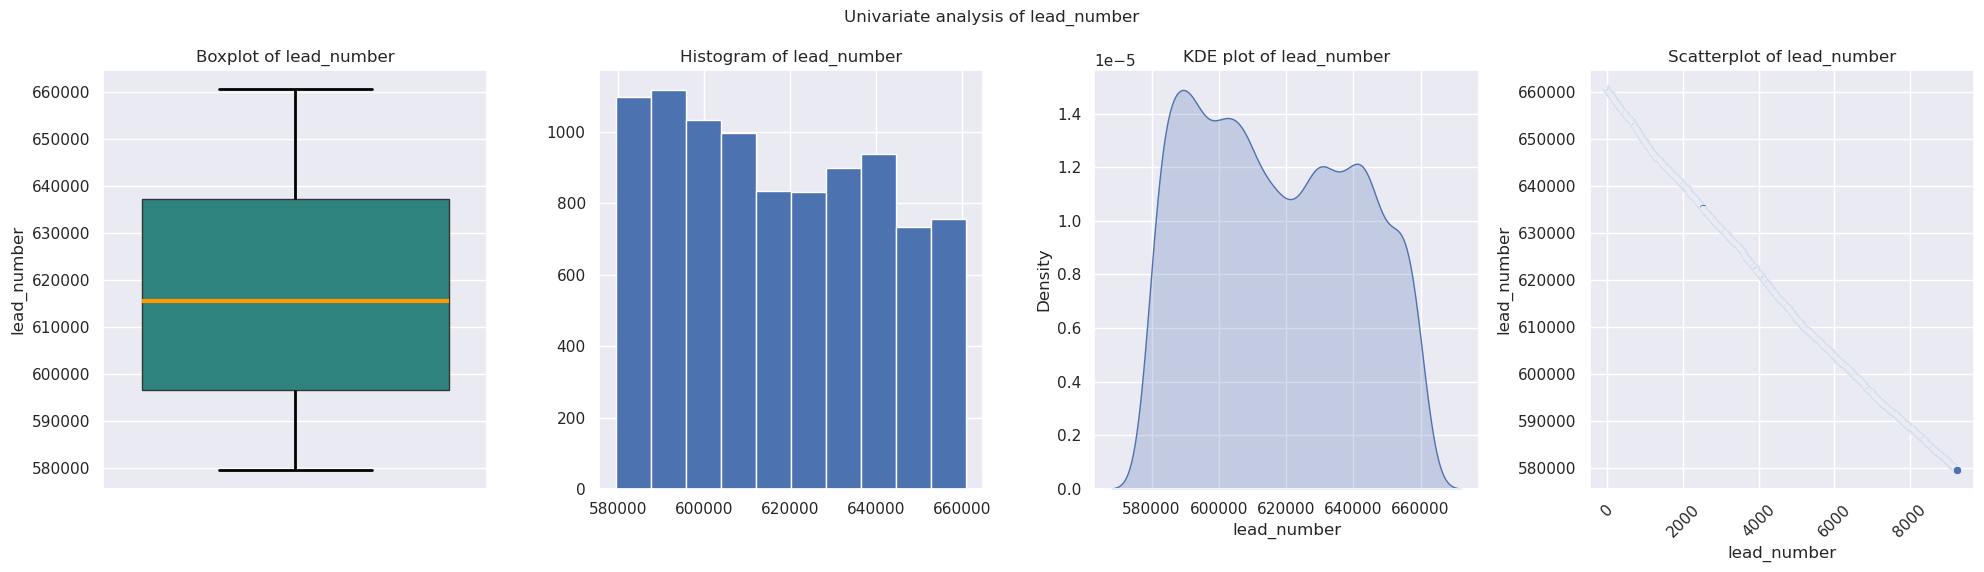

<Figure size 640x480 with 0 Axes>

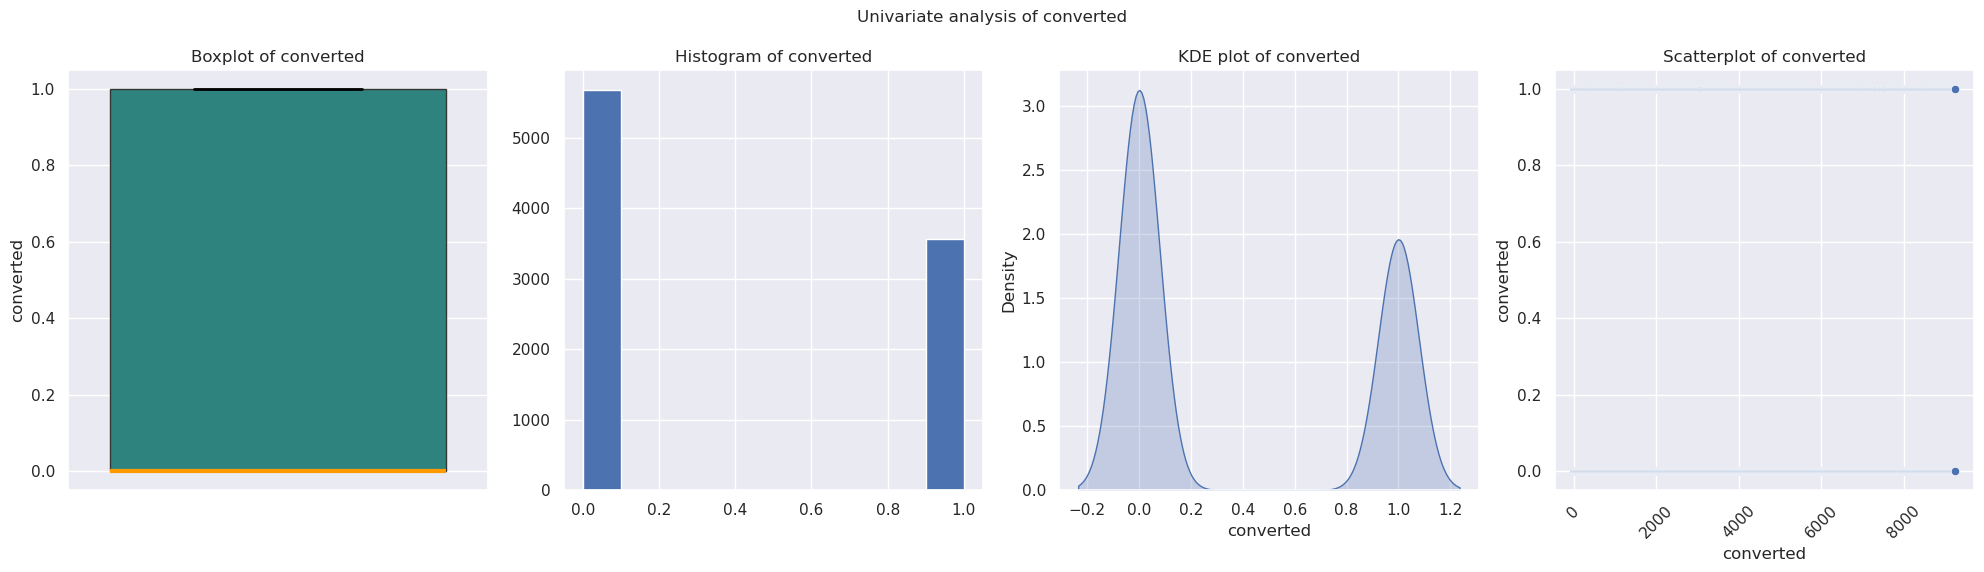

<Figure size 640x480 with 0 Axes>

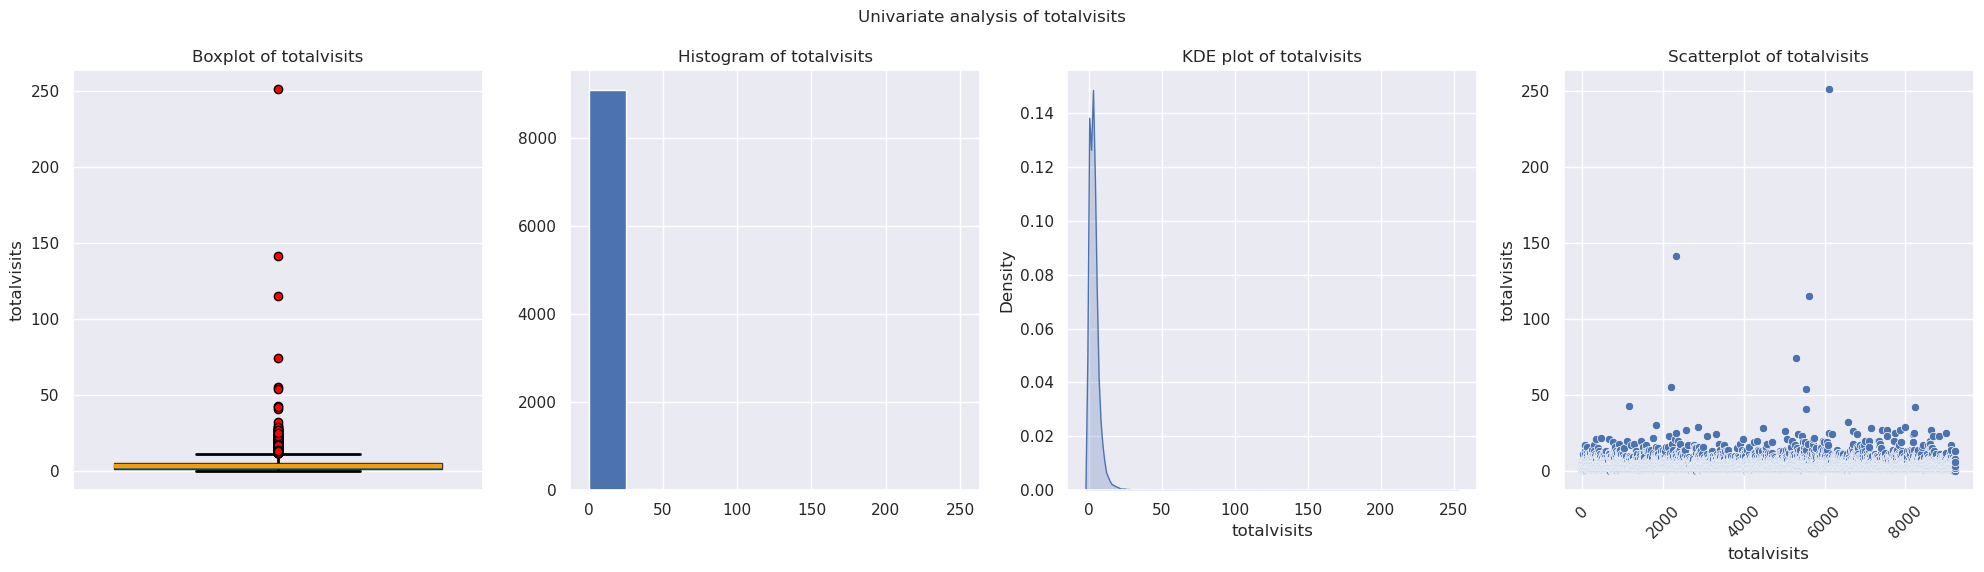

<Figure size 640x480 with 0 Axes>

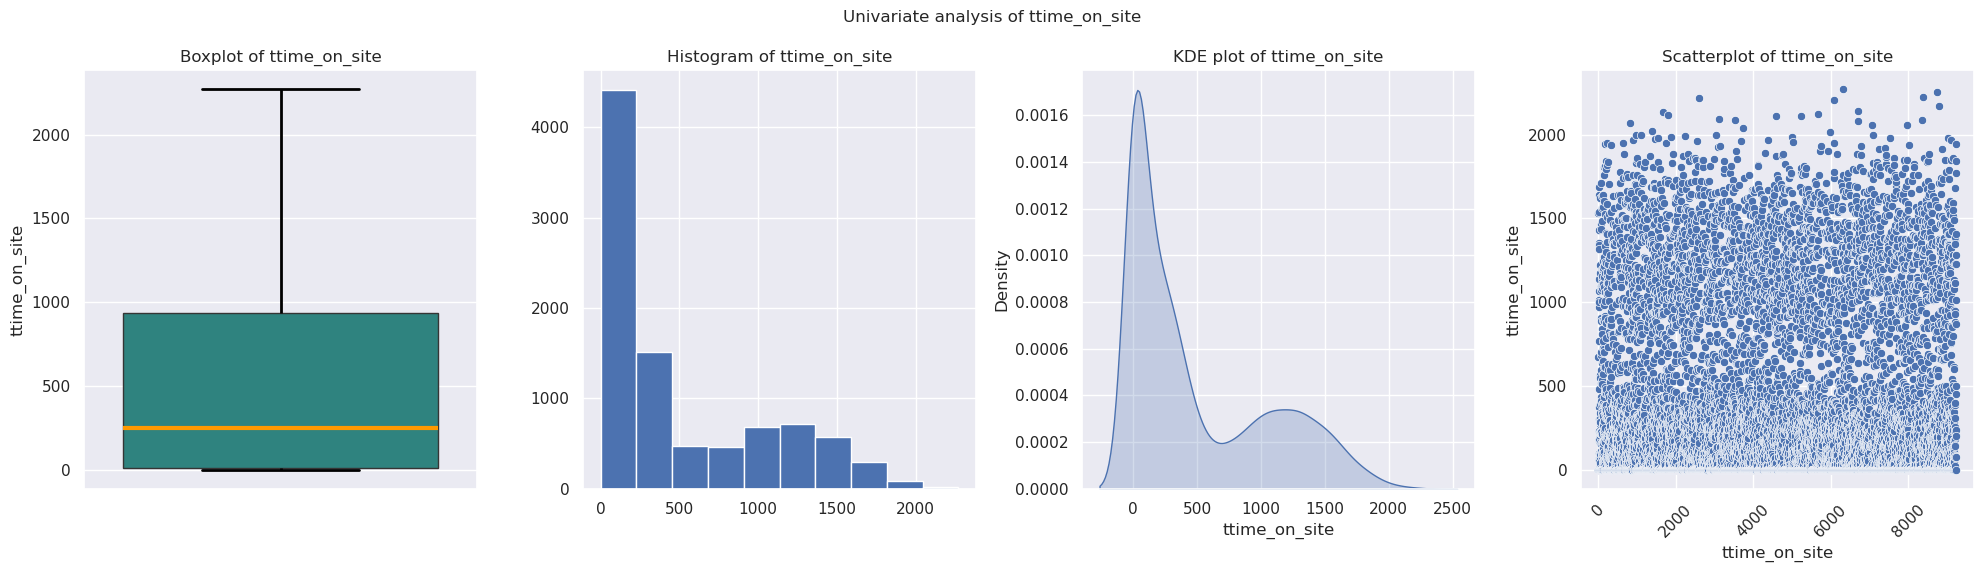

<Figure size 640x480 with 0 Axes>

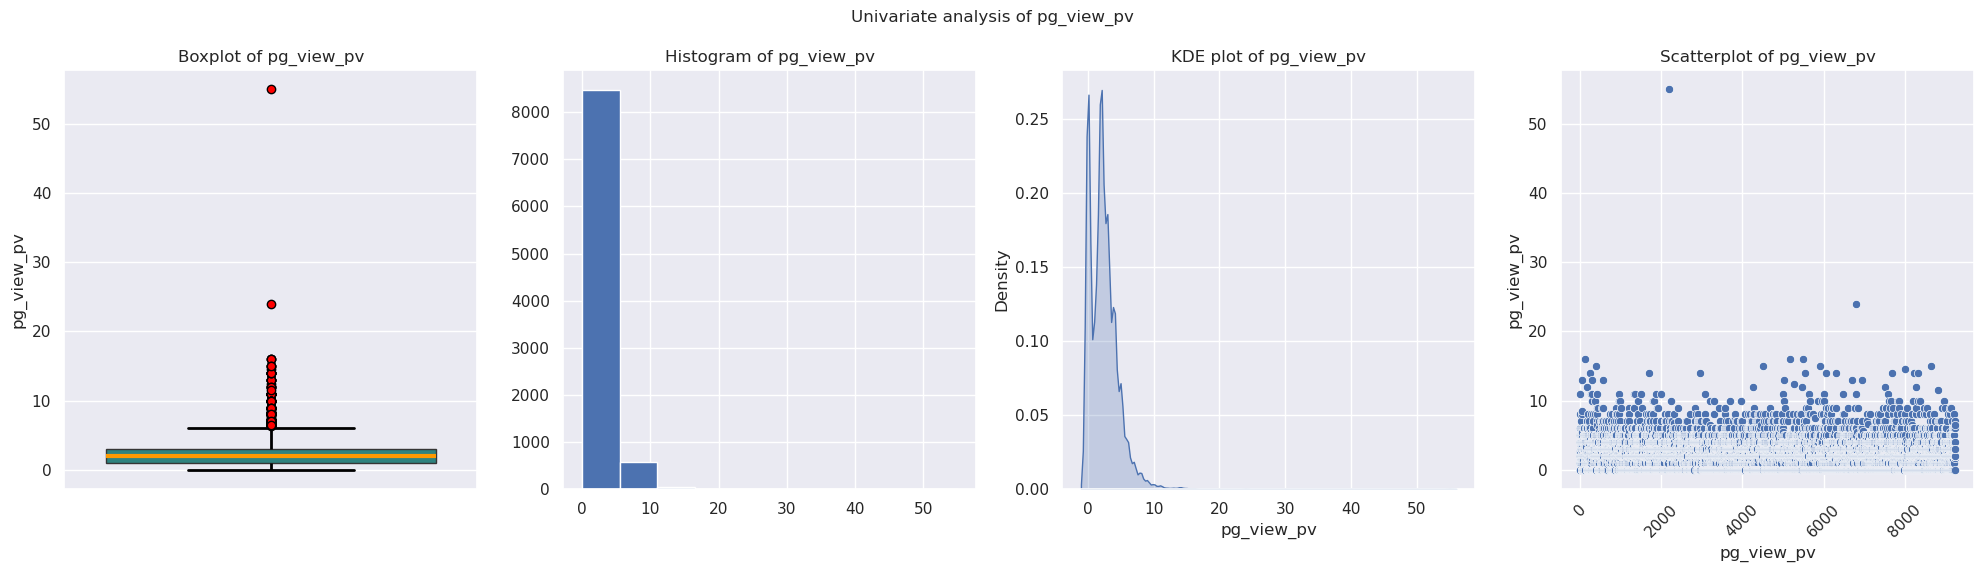

<Figure size 640x480 with 0 Axes>

In [132]:
univariate_plots(lead_score_df, lead_score_df.select_dtypes(include=[int,float]).columns, ftype='non_categorical', target='converted')

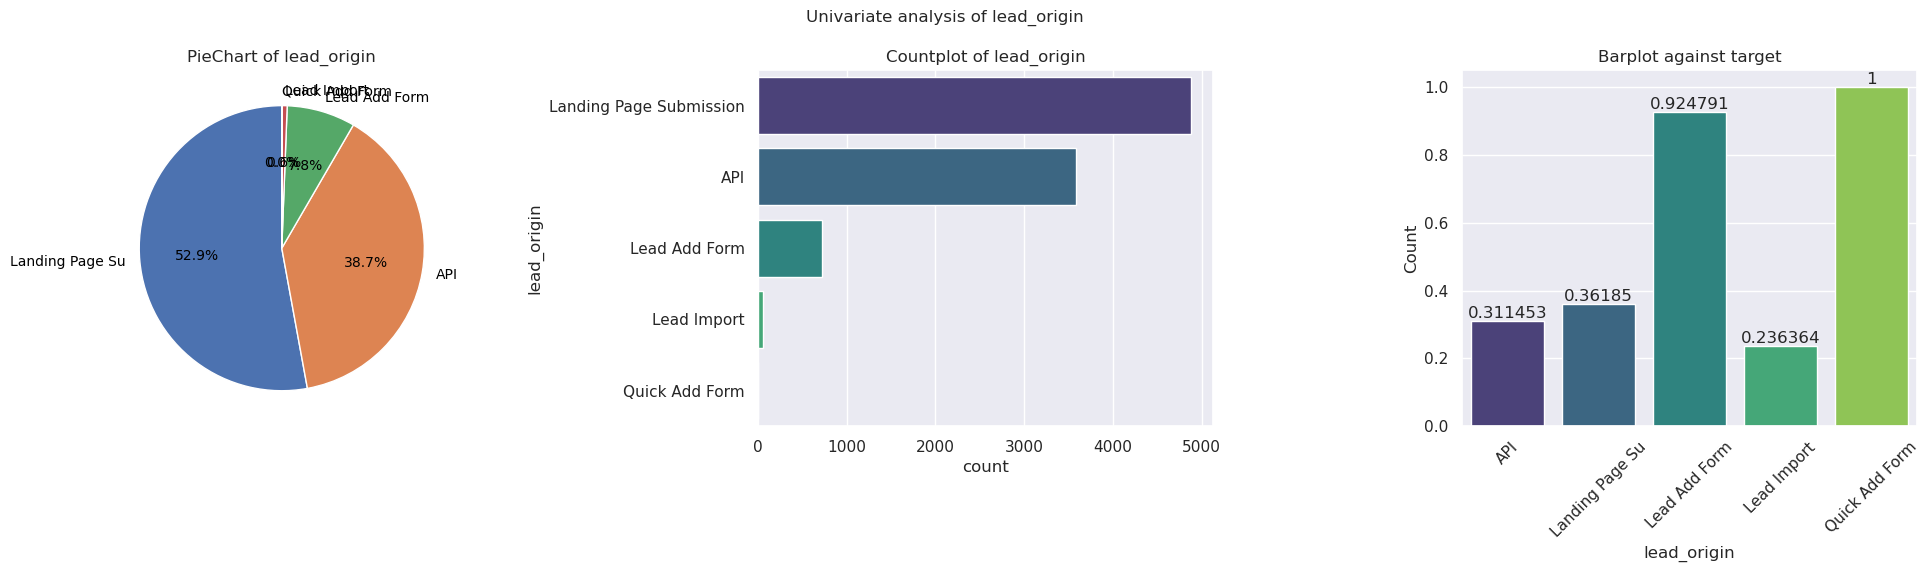

<Figure size 640x480 with 0 Axes>

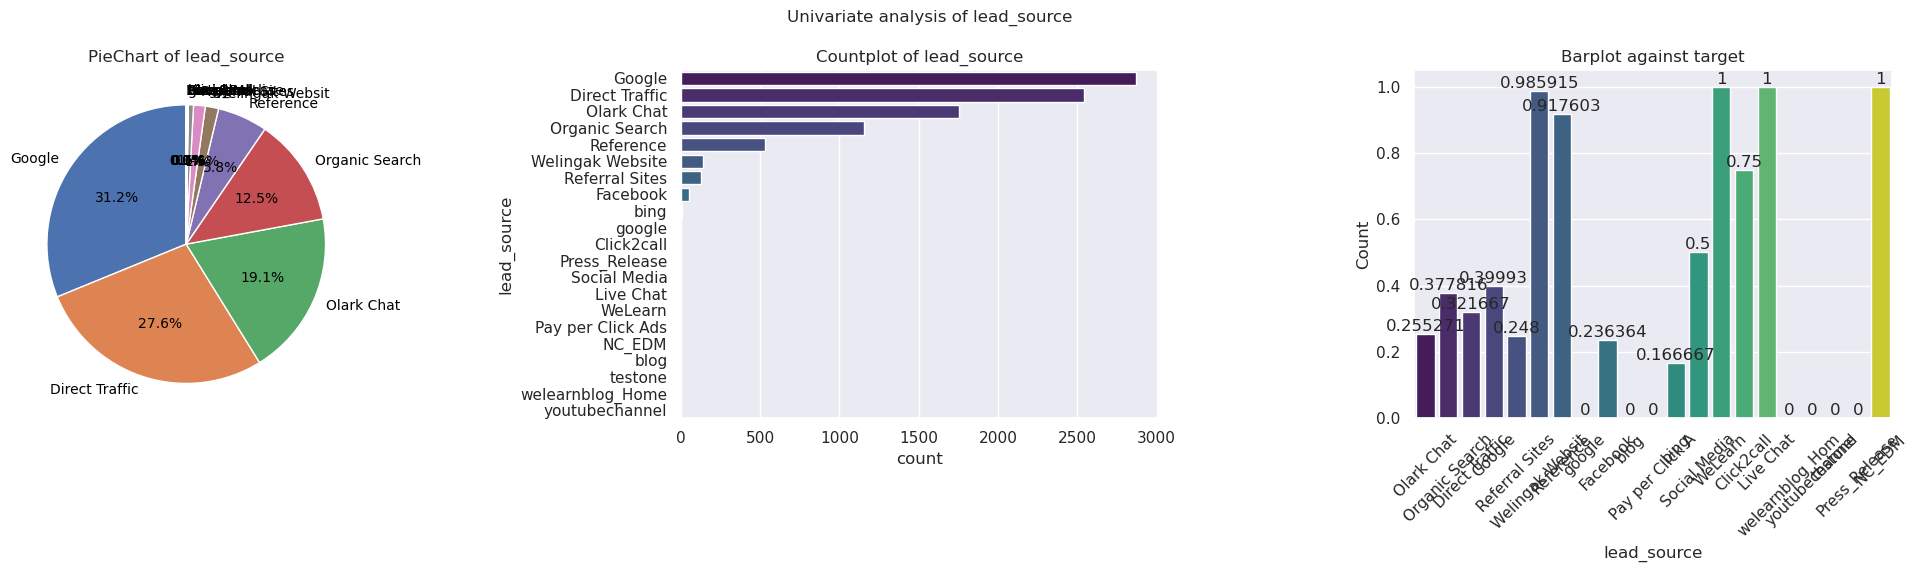

<Figure size 640x480 with 0 Axes>

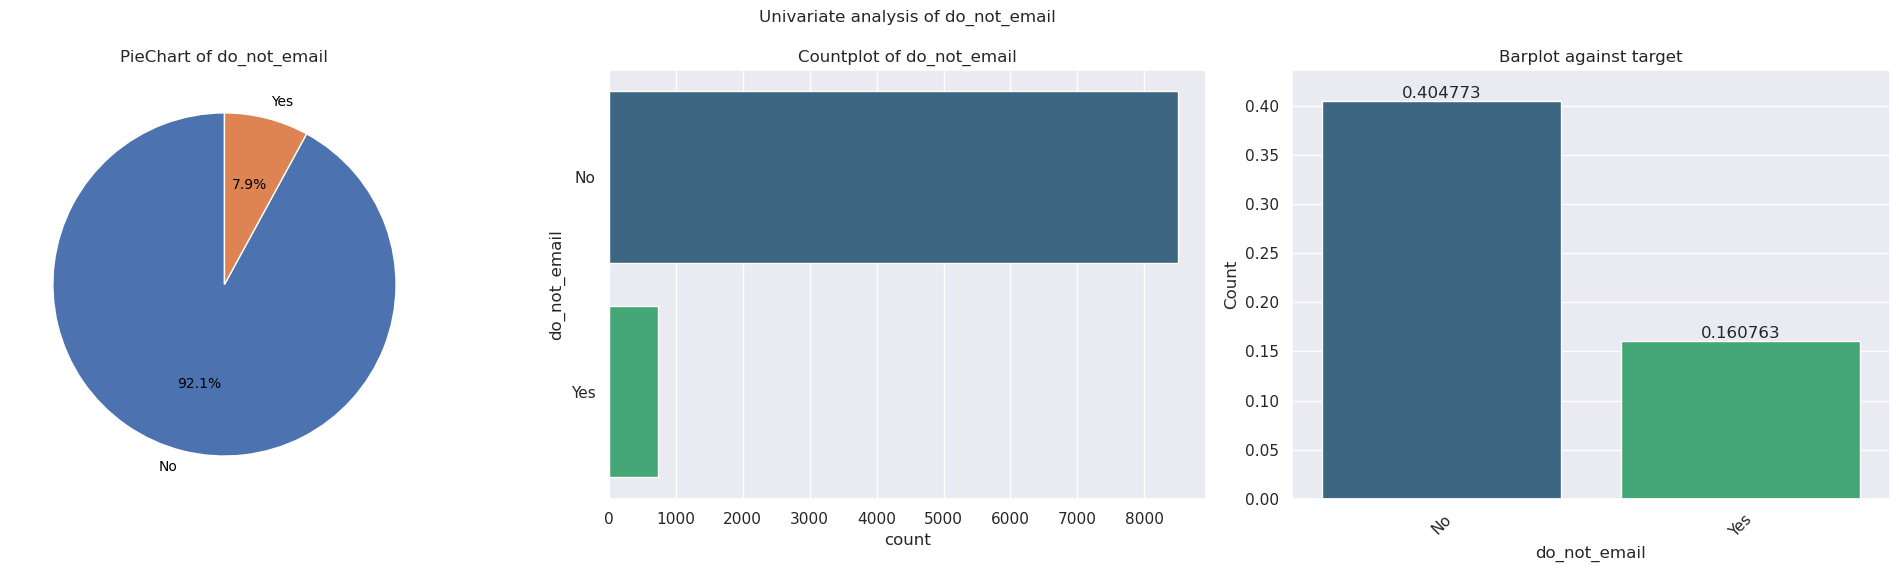

<Figure size 640x480 with 0 Axes>

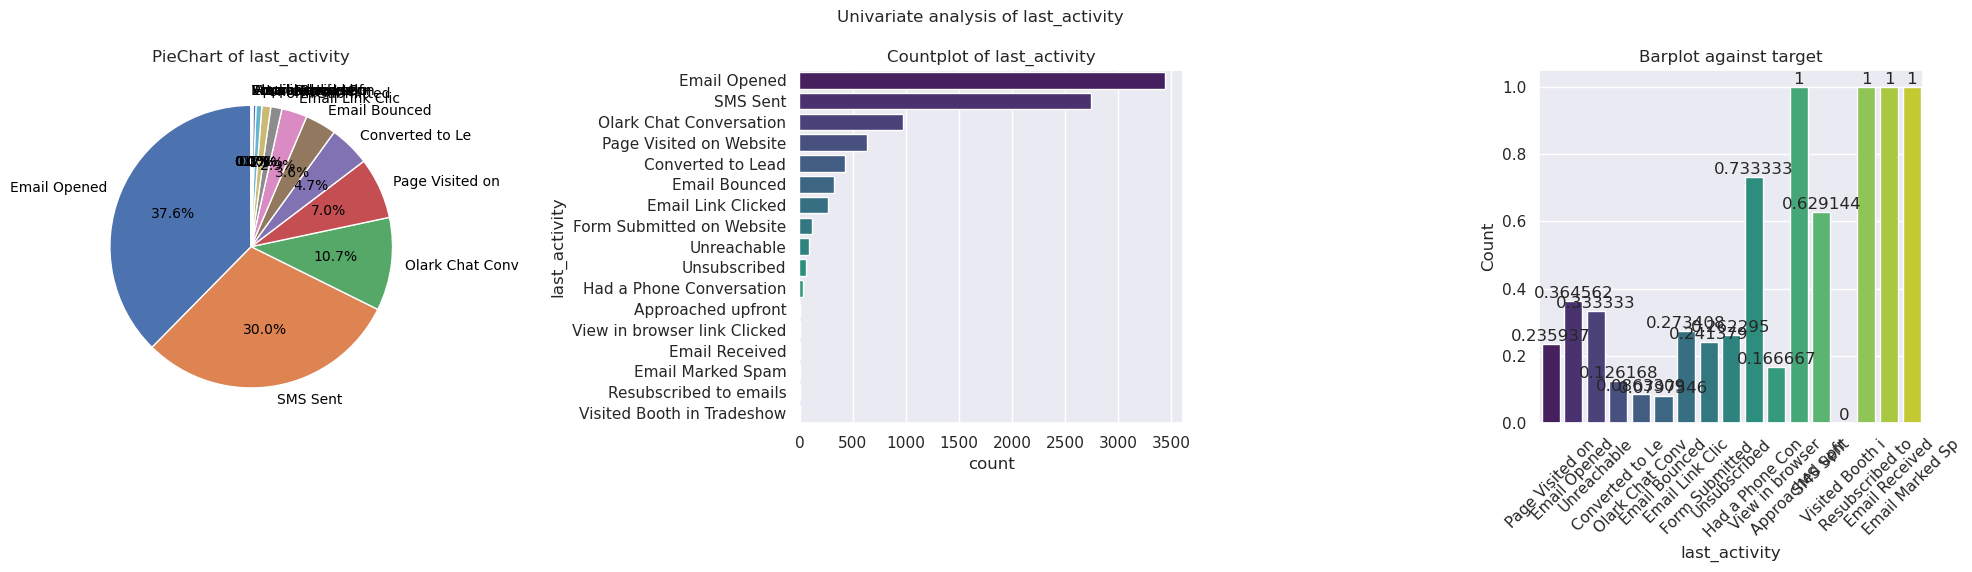

<Figure size 640x480 with 0 Axes>

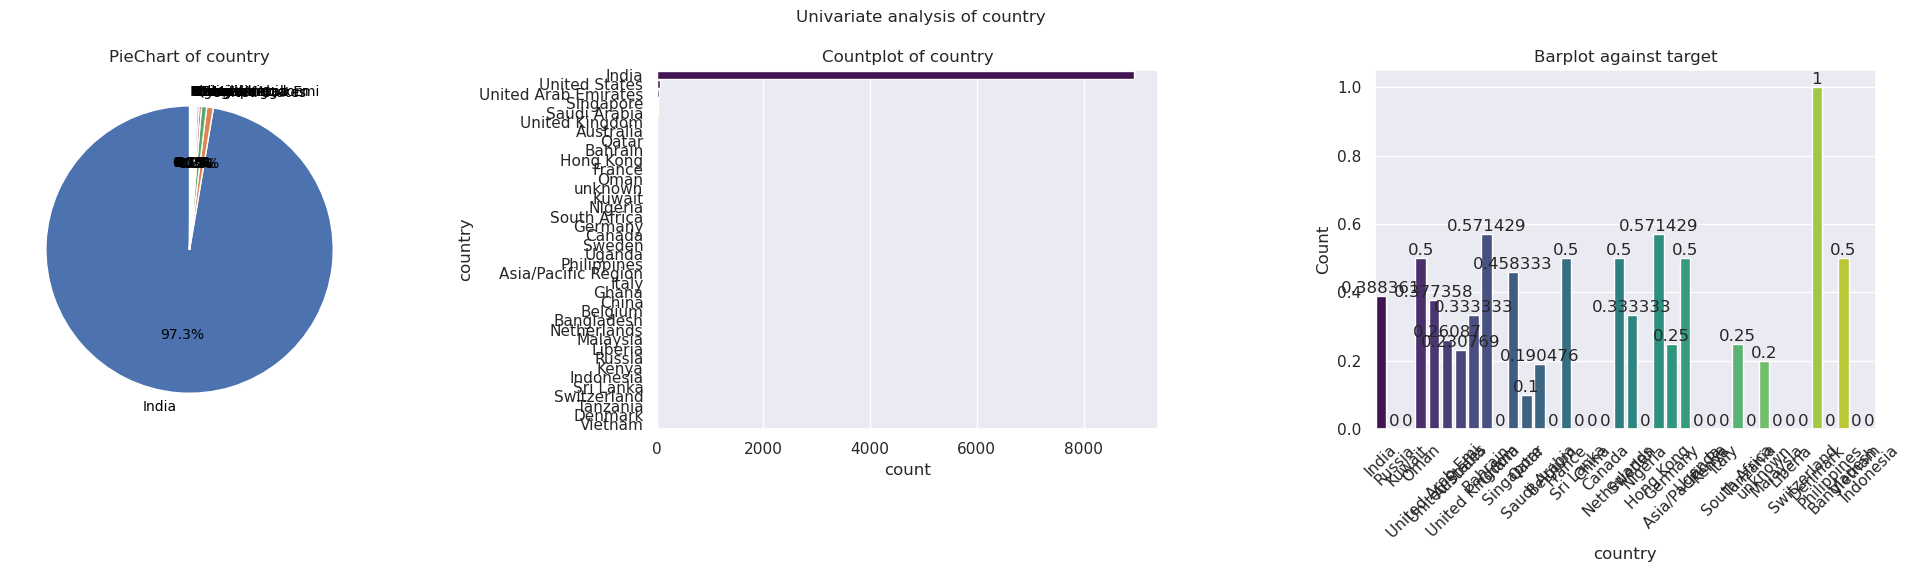

<Figure size 640x480 with 0 Axes>

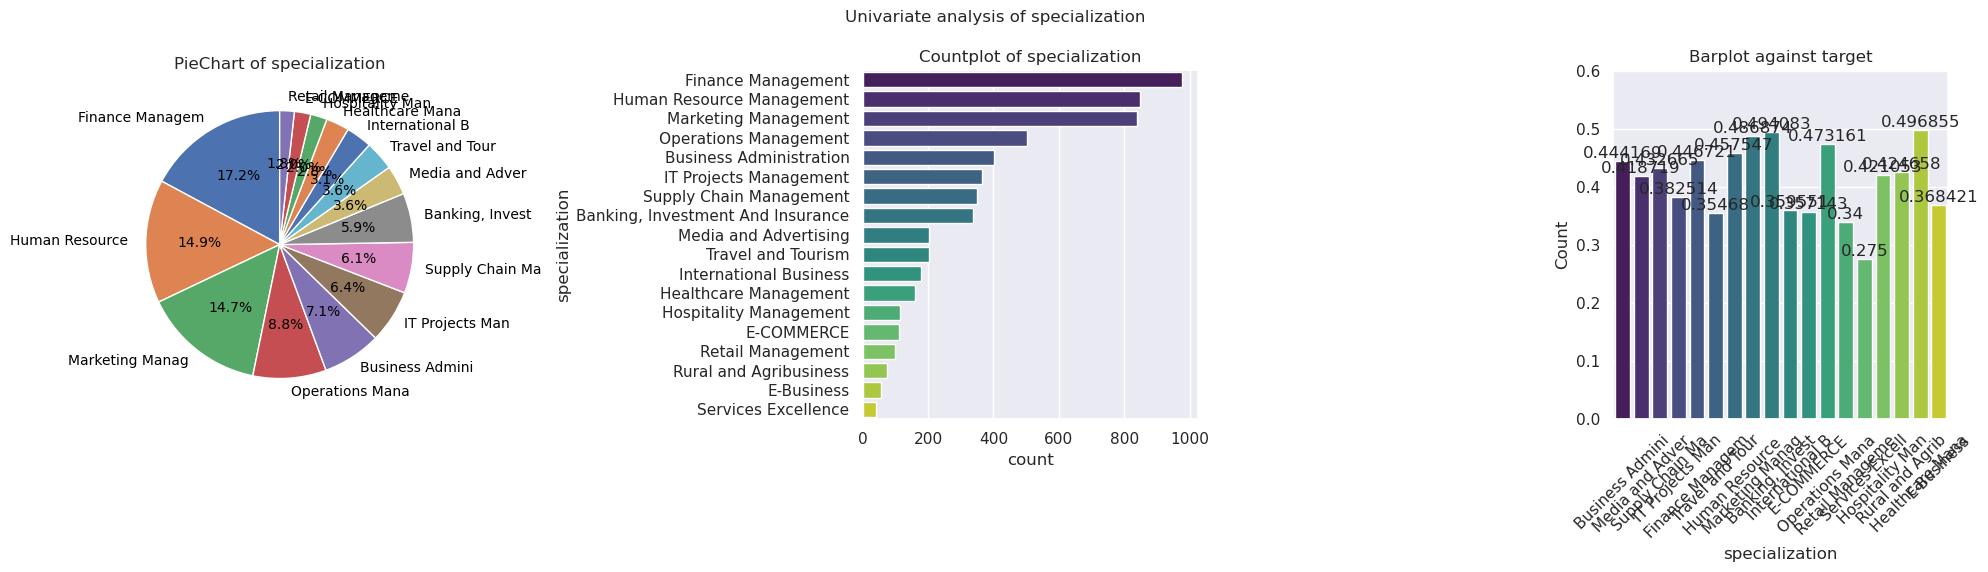

<Figure size 640x480 with 0 Axes>

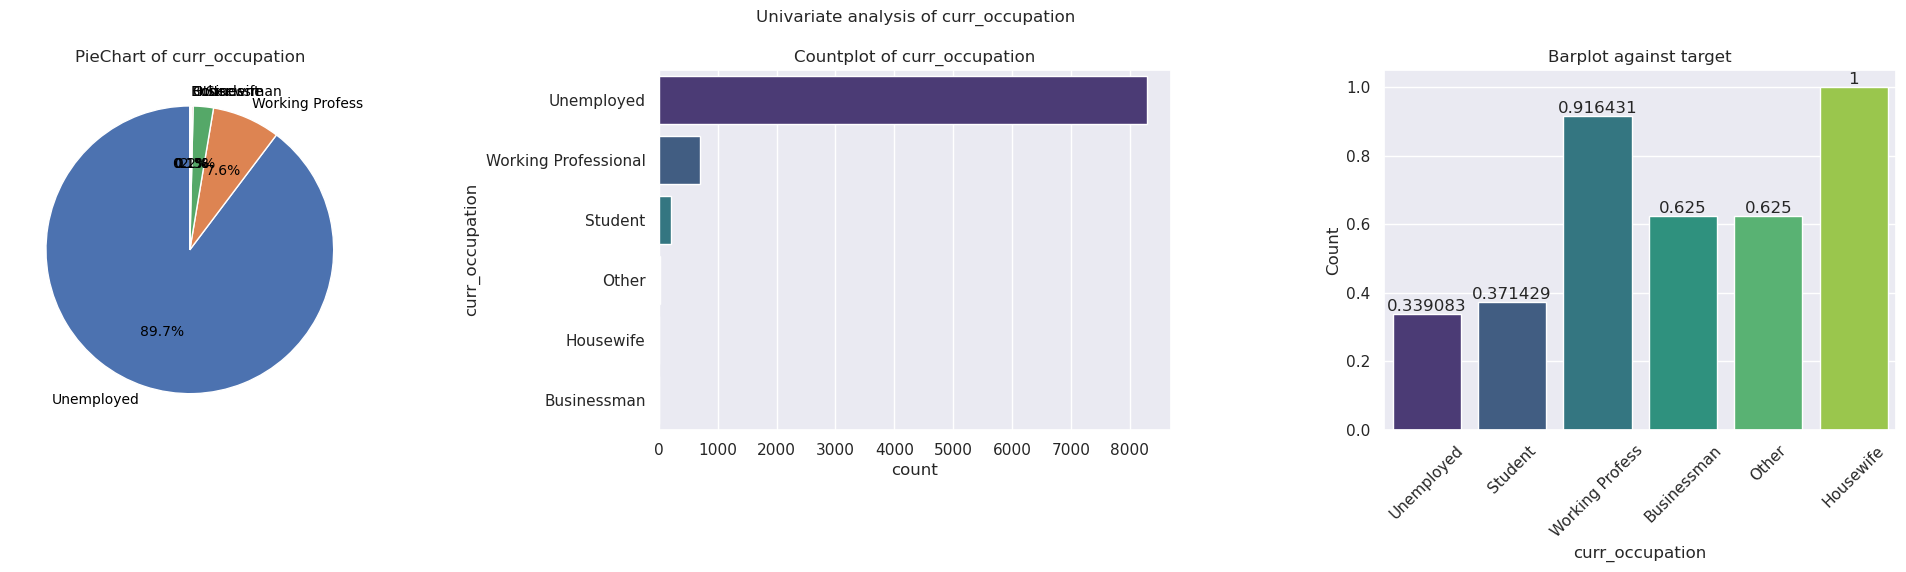

<Figure size 640x480 with 0 Axes>

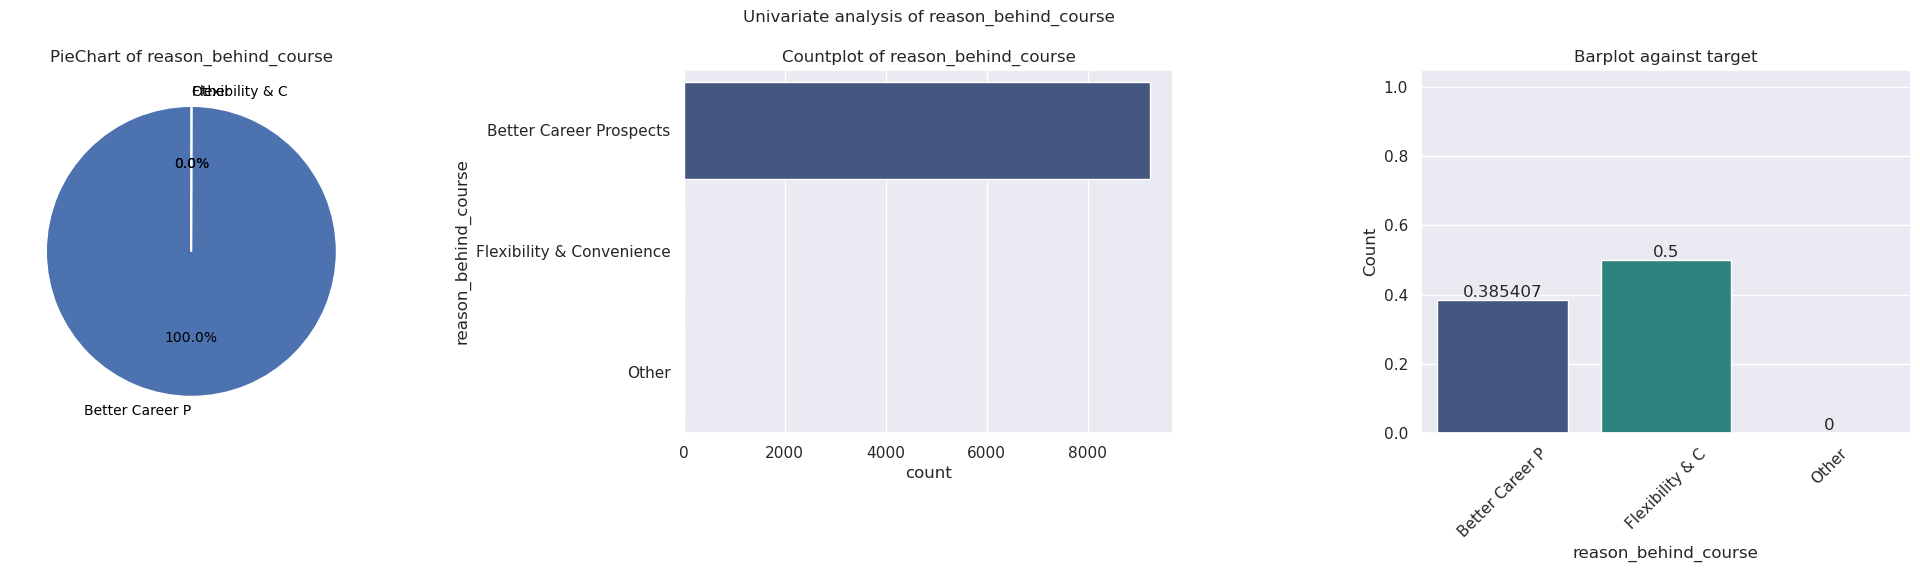

<Figure size 640x480 with 0 Axes>

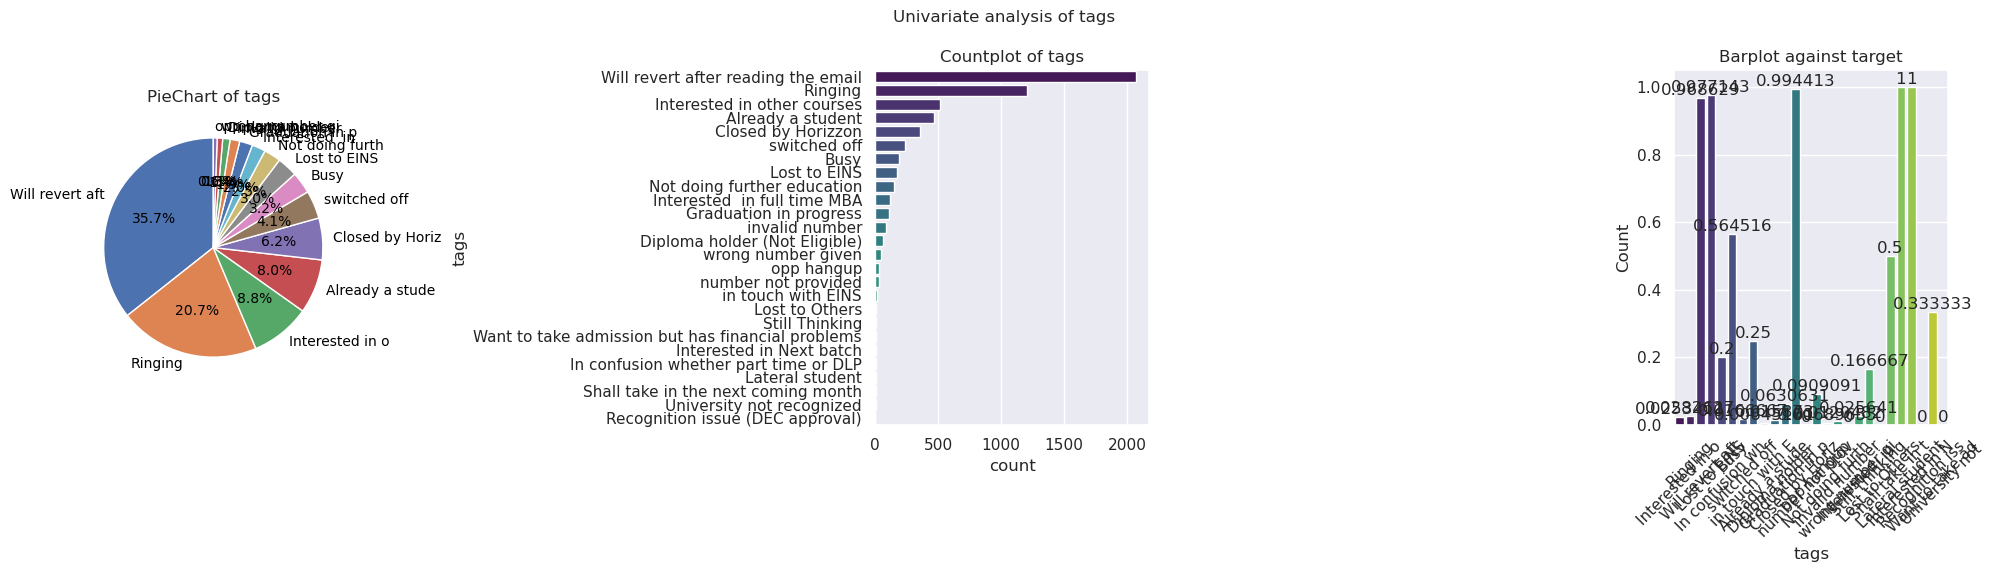

<Figure size 640x480 with 0 Axes>

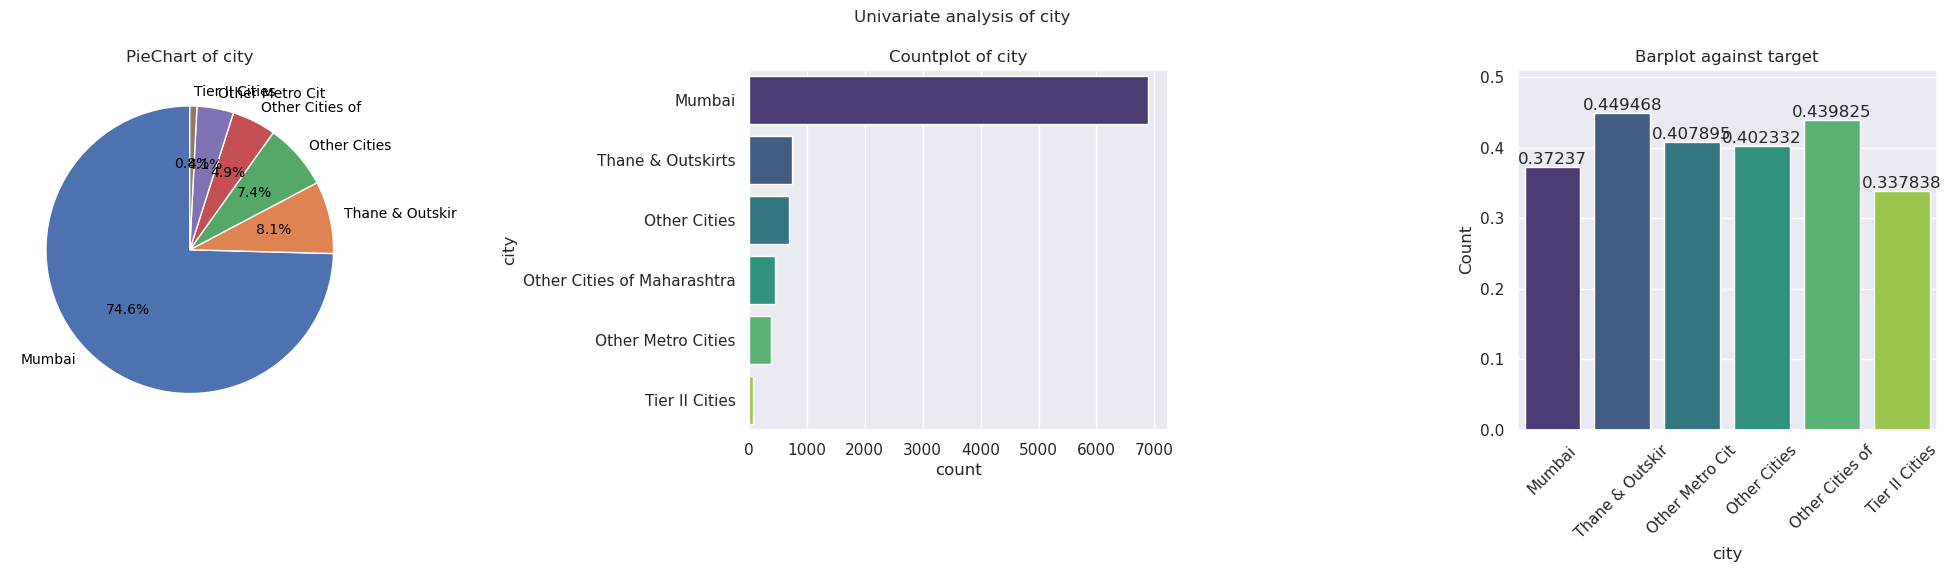

<Figure size 640x480 with 0 Axes>

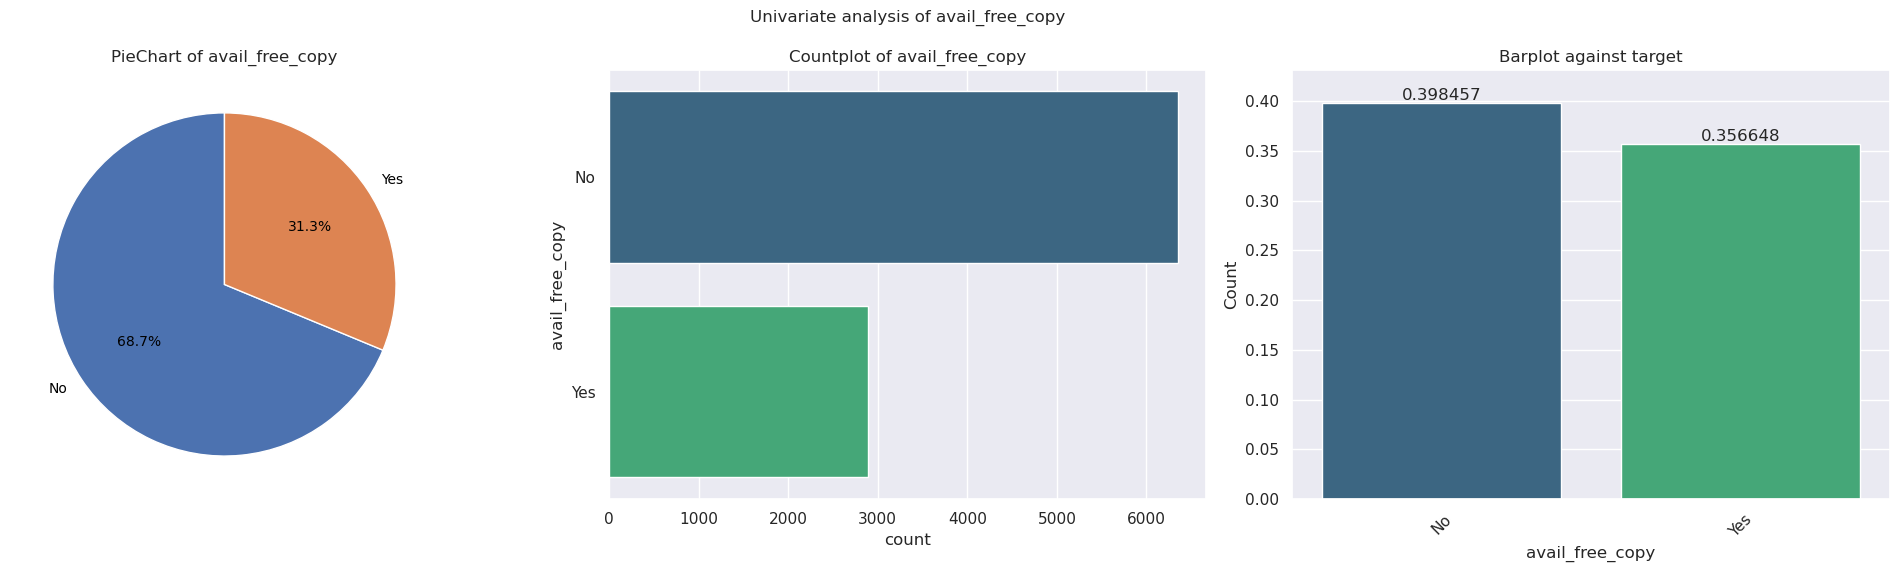

<Figure size 640x480 with 0 Axes>

In [133]:
univariate_plots(lead_score_df, lead_score_df.select_dtypes(exclude=[int,float]).columns, ftype='categorical', target='converted')

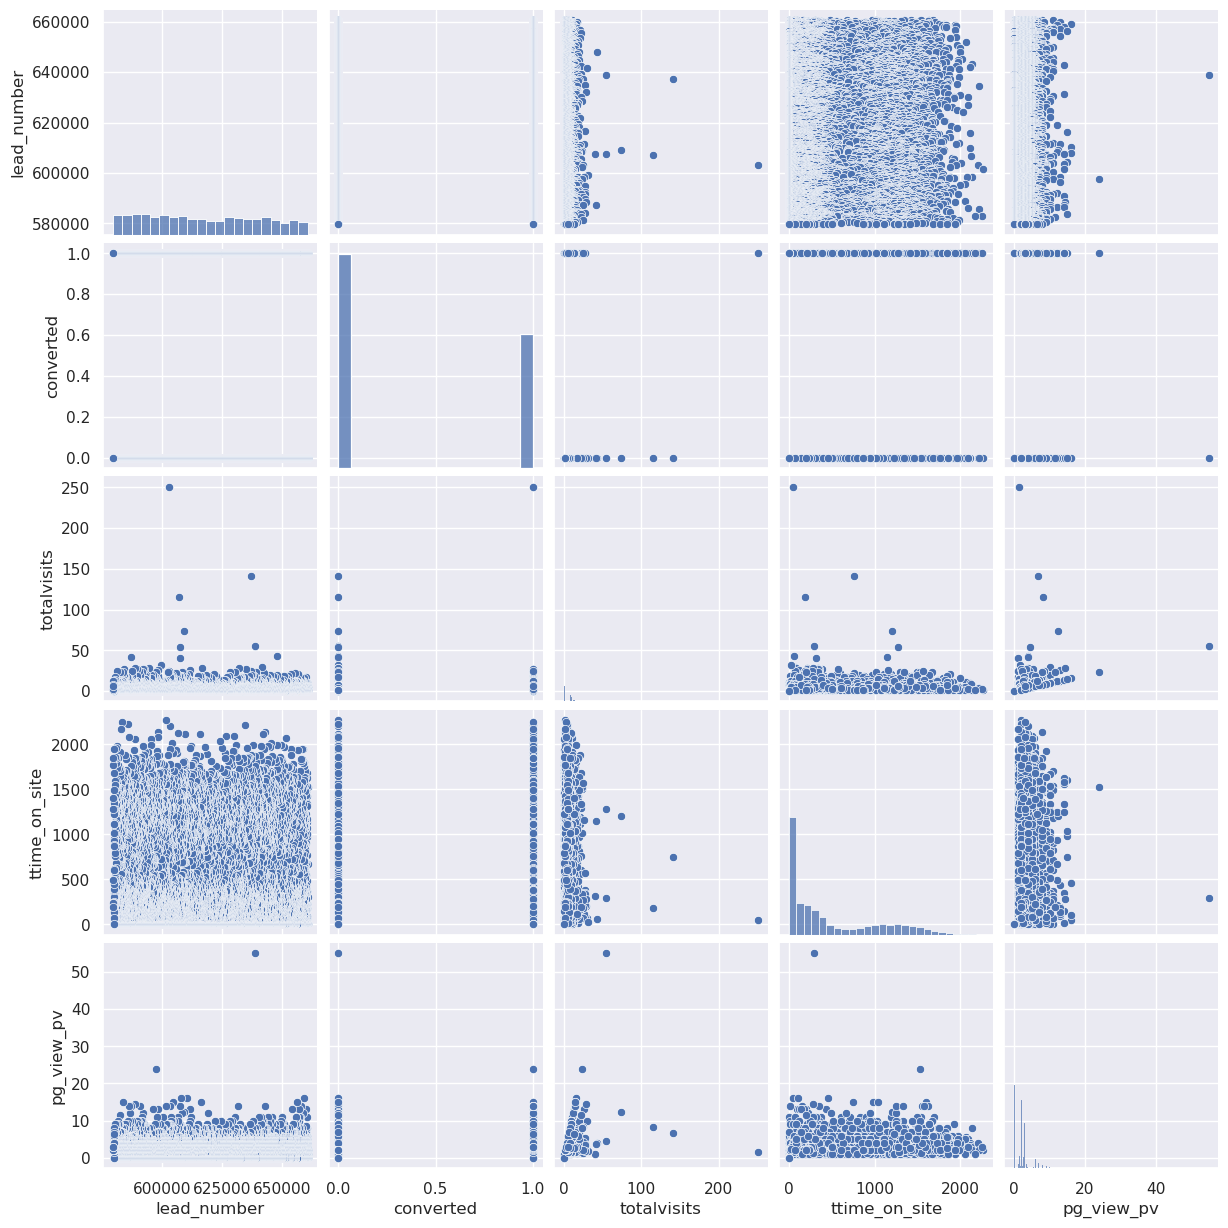

In [134]:
sns.pairplot(lead_score_df)

<Figure size 2000x600 with 0 Axes>

<Axes: >

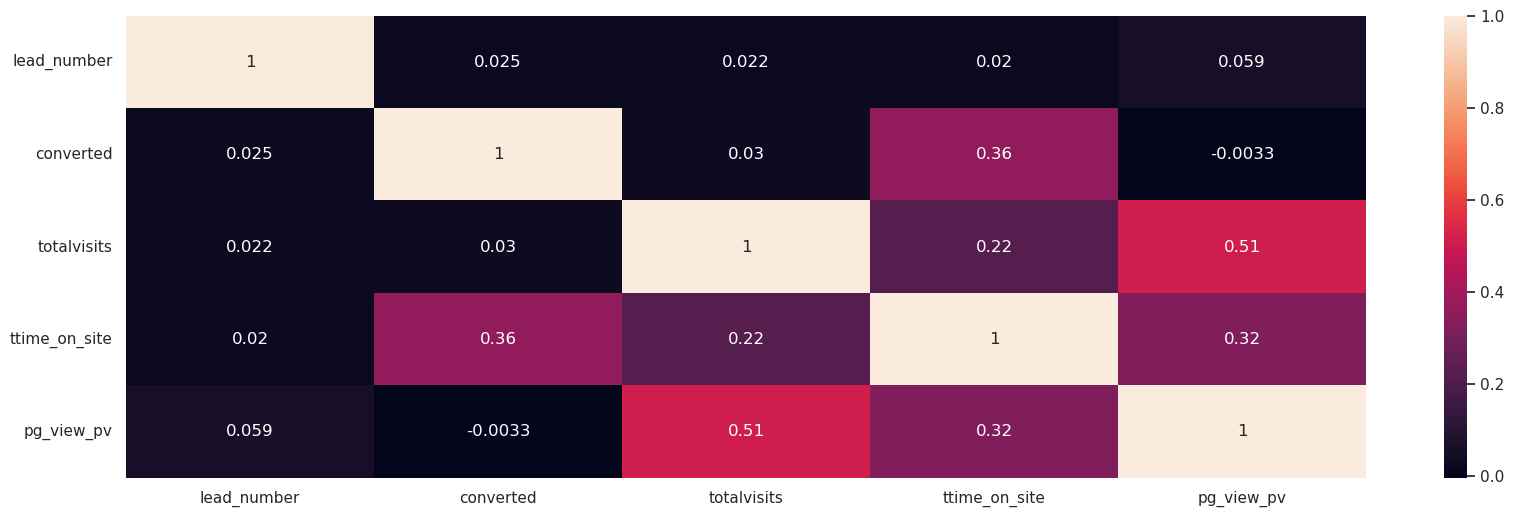

In [135]:
plt.figure(figsize = (20,6))# Size of the figure
sns.heatmap(lead_score_df.select_dtypes(exclude='category').corr(), annot = True)
plt.show()

####  ----------------------------------------------------------------------

#### Outlier Analysis and Capping

In [136]:
ex_val_df = get_extremeval_threshld(df= lead_score_df.select_dtypes(exclude=['category','object']) )
ex_val_df
lead_score_df.describe(percentiles=[.05,.1,.2,.5,.8,.9])

,thresh_low,thresh_high
name,,
lead_number,535130.375,698741.375
converted,-1.500,2.500
totalvisits,-5.000,11.000
ttime_on_site,-1374.000,2322.000
pg_view_pv,-2.000,6.000


,lead_number,converted,totalvisits,ttime_on_site,pg_view_pv
count,9240.000,9240.000,9103.000,9240.000,9103.000
mean,617188.436,0.385,3.445,487.698,2.363
std,23405.996,0.487,4.855,548.021,2.161
min,579533.000,0.000,0.000,0.000,0.000
5%,582869.900,0.000,0.000,0.000,0.000
10%,586361.700,0.000,0.000,0.000,0.000
20%,592772.800,0.000,0.000,0.000,0.000
50%,615479.000,0.000,3.000,248.000,2.000
80%,641577.600,1.000,5.000,1087.200,4.000
90%,650506.100,1.000,7.000,1380.000,5.000


In [137]:
# Fix Outliers by setting either thresh low or thresh low for both extremes 
lower_cutoff = ex_val_df.loc['pg_view_pv','thresh_low']
lead_score_df['pg_view_pv'] = np.where((lead_score_df['pg_view_pv'] < lower_cutoff), lower_cutoff, lead_score_df['pg_view_pv'])
upper_cutoff = ex_val_df.loc['pg_view_pv','thresh_high']
lead_score_df['pg_view_pv'] = np.where((lead_score_df['pg_view_pv'] > upper_cutoff), upper_cutoff, lead_score_df['pg_view_pv'])

# Fix Outliers by setting either thresh low or thresh low for both extremes
lower_cutoff = ex_val_df.loc['totalvisits','thresh_low']
lead_score_df['totalvisits'] = np.where((lead_score_df['totalvisits'] < lower_cutoff), lower_cutoff, lead_score_df['totalvisits'])
upper_cutoff = ex_val_df.loc['totalvisits','thresh_high']
lead_score_df['totalvisits'] = np.where((lead_score_df['totalvisits'] > upper_cutoff), upper_cutoff, lead_score_df['totalvisits'])

# Fix Outliers by setting either thresh low or thresh low for both extremes
lower_cutoff = ex_val_df.loc['ttime_on_site','thresh_low']
lead_score_df['ttime_on_site'] = np.where((lead_score_df['ttime_on_site'] < lower_cutoff), lower_cutoff, lead_score_df['ttime_on_site'])
upper_cutoff = ex_val_df.loc['ttime_on_site','thresh_high']
lead_score_df['ttime_on_site'] = np.where((lead_score_df['ttime_on_site'] > upper_cutoff), upper_cutoff, lead_score_df['ttime_on_site'])

In [138]:
lead_score_df.describe()

,lead_number,converted,totalvisits,ttime_on_site,pg_view_pv
count,9240.000,9240.000,9103.000,9240.000,9103.000
mean,617188.436,0.385,3.221,487.698,2.259
std,23405.996,0.487,2.882,548.021,1.793
min,579533.000,0.000,0.000,0.000,0.000
25%,596484.500,0.000,1.000,12.000,1.000
50%,615479.000,0.000,3.000,248.000,2.000
75%,637387.250,1.000,5.000,936.000,3.000
max,660737.000,1.000,11.000,2272.000,6.000


####  ----------------------------------------------------------------------

#### Custom Code to be removed !!!!!!

In [139]:
# replace Yes No with 1 and 0
lead_score_df = lead_score_df.replace(to_replace=['Yes', 'No'], value=[1, 0])

In [140]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

In [141]:
# for label_encoding:
cols_to_le = [i for i in lead_score_df.columns if ((lead_score_df[i].dtype == 'category') and len(lead_score_df[i].unique()) > 5)]
cols_to_le

['lead_source',
 'last_activity',
 'country',
 'specialization',
 'curr_occupation',
 'tags',
 'city']

In [142]:
le = LabelEncoder()
df_le = lead_score_df[cols_to_le].apply(le.fit_transform)
df_le


,lead_source,last_activity,country,specialization,curr_occupation,tags,city
0,6,10,12,18,4,8,0
1,7,5,12,18,4,14,0
2,1,5,12,1,3,19,0
3,1,13,12,11,4,14,0
4,3,1,12,18,4,19,0
...,...,...,...,...,...,...,...
9235,1,4,25,8,4,19,0
9236,1,12,12,11,4,25,0
9237,1,12,12,1,4,21,0
9238,3,12,12,7,4,26,3


<Figure size 2000x1000 with 0 Axes>

<Axes: >

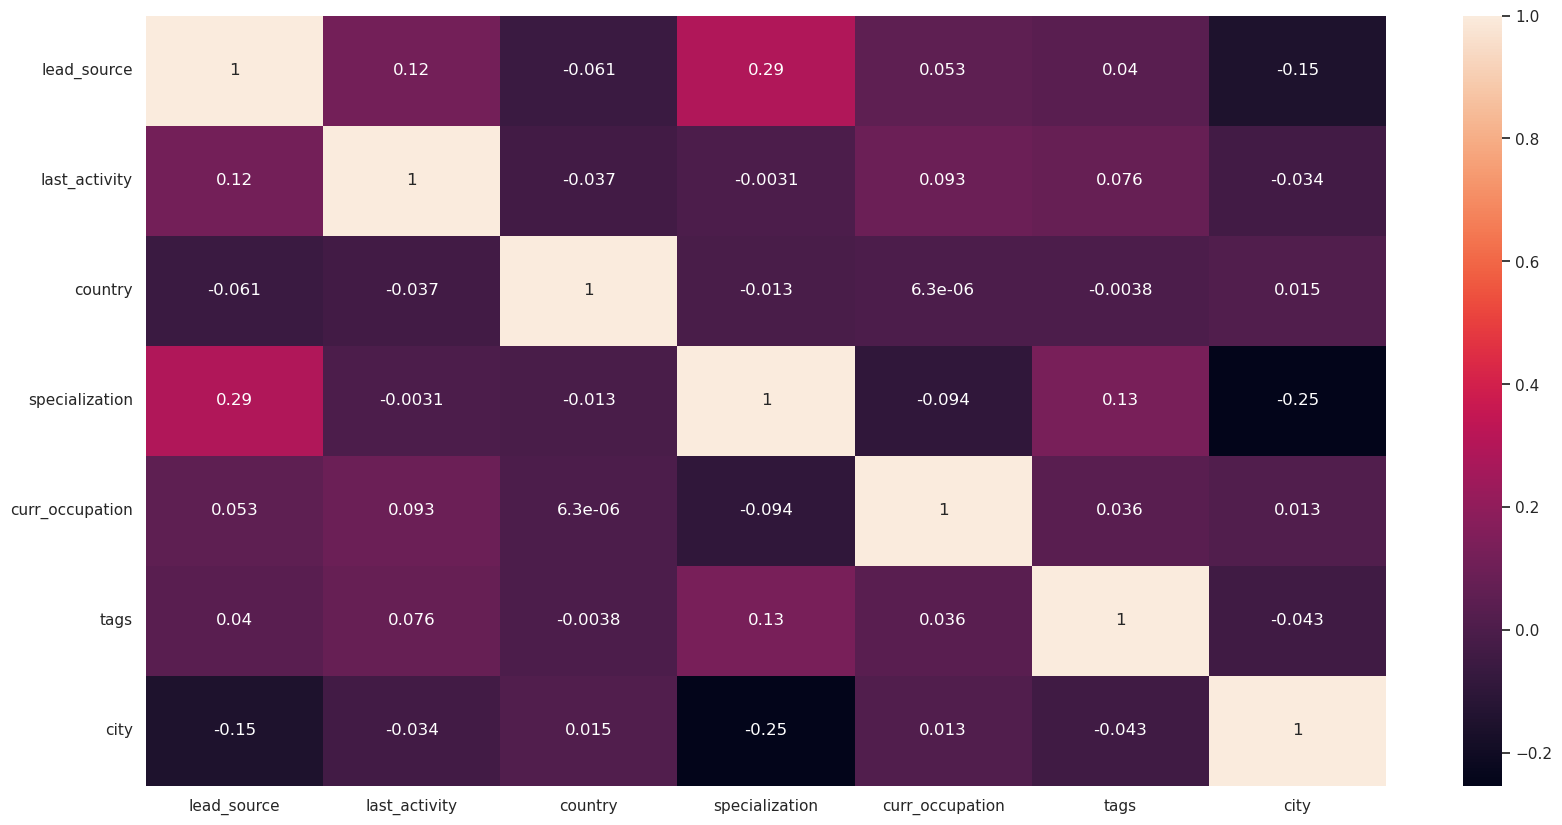

In [143]:
plt.figure(figsize=(20,10))
sns.heatmap(df_le.corr(), annot=True)

In [144]:
new_ls_df = lead_score_df[lead_score_df.columns.difference(cols_to_le)]
new_ls_df = new_ls_df.merge(right=df_le, right_index=True, left_index=True)
new_ls_df.head()

,avail_free_copy,converted,do_not_email,lead_number,lead_origin,pg_view_pv,reason_behind_course,totalvisits,ttime_on_site,lead_source,last_activity,country,specialization,curr_occupation,tags,city
0,0,0,0,660737,API,0.000,Better Career Prospects,0.000,0.000,6,10,12,18,4,8,0
1,0,0,0,660728,API,2.500,Better Career Prospects,5.000,674.000,7,5,12,18,4,14,0
2,1,1,0,660727,Landing Page Submission,2.000,Better Career Prospects,2.000,1532.000,1,5,12,1,3,19,0
3,0,0,0,660719,Landing Page Submission,1.000,Better Career Prospects,1.000,305.000,1,13,12,11,4,14,0
4,0,1,0,660681,Landing Page Submission,1.000,Better Career Prospects,2.000,1428.000,3,1,12,18,4,19,0


In [145]:
check_cols_null_pct(new_ls_df)
new_ls_df = new_ls_df[(new_ls_df.notna()).all(axis=1)]
check_cols_null_pct(new_ls_df)

pg_view_pv             1.483
totalvisits            1.483
avail_free_copy        0.000
converted              0.000
do_not_email           0.000
lead_number            0.000
lead_origin            0.000
reason_behind_course   0.000
ttime_on_site          0.000
lead_source            0.000
last_activity          0.000
country                0.000
specialization         0.000
curr_occupation        0.000
tags                   0.000
city                   0.000
dtype: float64

avail_free_copy        0.000
converted              0.000
do_not_email           0.000
lead_number            0.000
lead_origin            0.000
pg_view_pv             0.000
reason_behind_course   0.000
totalvisits            0.000
ttime_on_site          0.000
lead_source            0.000
last_activity          0.000
country                0.000
specialization         0.000
curr_occupation        0.000
tags                   0.000
city                   0.000
dtype: float64

In [146]:
sorted([f'{i} - {new_ls_df[i].unique()}' for i in new_ls_df.columns])

['avail_free_copy - [0, 1]\nCategories (2, int64): [0, 1]',
 'city - [0 4 3 1 2 5]',
 'converted - [0 1]',
 'country - [12 24 16 21 33 35  1 34  2 10 26 23 25  4  8 28  6  5 19 29 20 11  9  0\n 32 15 14 27 31 37 18 17 30  7 22  3 36 13]',
 'curr_occupation - [4 3 5 0 2 1]',
 'do_not_email - [0, 1]\nCategories (2, int64): [0, 1]',
 'last_activity - [10  5 13  1  9  2  3  7 14  8 15 12 16  0 11  6  4]',
 'lead_number - [660737 660728 660727 ... 579545 579538 579533]',
 "lead_origin - ['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import']\nCategories (5, object): ['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import', 'Quick Add Form']",
 'lead_source - [ 6  7  1  3 11 10 17 14  2 16  8 15 12 21 13  0  4 19 20 18  9  5]',
 'pg_view_pv - [0.   2.5  2.   1.   4.   6.   2.67 5.   3.   1.33 1.5  3.5  2.33 5.5\n 1.67 4.5  3.33 1.71 1.8  4.33 3.4  1.25 1.75 2.63 2.25 3.67 1.43 2.6\n 4.75 1.27 3.25 5.33 2.57 2.17 2.75 2.8  2.2  2.86 3.91 1.4  5.67 3.2\n 1.38 2.09 2.4  5.25

In [147]:
new_ls_df.shape

(9103, 16)

####  ----------------------------------------------------------------------

#### Dummy Encoding

In [148]:
# for label_encoding:
cols_to_de = [i for i in new_ls_df.columns if ((new_ls_df[i].dtype == 'category') and len(new_ls_df[i].unique()) <= 5)]
cols_to_de
new_ls_df = pd.get_dummies(new_ls_df, columns=cols_to_de, drop_first=True, dtype=float)

['avail_free_copy', 'do_not_email', 'lead_origin', 'reason_behind_course']

In [149]:
new_ls_df.head(1)

,converted,lead_number,pg_view_pv,totalvisits,ttime_on_site,lead_source,last_activity,country,specialization,curr_occupation,tags,city,avail_free_copy_1,do_not_email_1,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_origin_Quick Add Form,reason_behind_course_Flexibility & Convenience,reason_behind_course_Other
0,0,660737,0.000,0.000,0.000,6,10,12,18,4,8,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


####  ----------------------------------------------------------------------

#### Model Training

In [150]:
import statsmodels.api as sm 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, recall_score,precision_score, roc_auc_score, confusion_matrix, f1_score, roc_curve, precision_recall_curve

In [151]:
X = new_ls_df.drop(['converted'],axis=1)
y = new_ls_df['converted']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [153]:
# to_scale = ['lead_number', 'totalvisits', 'ttime_on_site', 'pg_view_pv']
to_scale = ['lead_number', 'totalvisits', 'ttime_on_site', 'pg_view_pv', 'lead_source', 'last_activity', 'country', 'specialization', 'curr_occupation','tags']
scaler = StandardScaler()
X_train[to_scale] = scaler.fit_transform(X_train[to_scale],y_train)
X_train.head()

,lead_number,pg_view_pv,totalvisits,ttime_on_site,lead_source,last_activity,country,specialization,curr_occupation,tags,city,avail_free_copy_1,do_not_email_1,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_origin_Quick Add Form,reason_behind_course_Flexibility & Convenience,reason_behind_course_Other
9000,-1.538,-0.142,-0.425,-0.771,-0.391,0.348,-0.140,1.061,-0.116,-2.106,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6902,-0.879,-0.699,-0.769,0.026,-1.034,-1.570,-0.140,-0.570,-0.116,0.853,0,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000
7593,-1.103,-1.256,-1.114,-0.881,0.574,-0.748,-0.140,1.061,-0.116,0.971,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1498,1.180,1.252,1.986,-0.124,0.896,-0.748,-0.140,0.409,-0.116,-1.987,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4137,0.140,0.416,0.953,1.042,-0.391,-0.748,-0.140,-1.712,-0.116,0.143,0,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000


In [154]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7263
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3414.3
Date:                Sat, 12 Oct 2024   Deviance:                       6828.6
Time:                        19:03:02   Pearson chi2:                 8.56e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3224
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.5063      0.059     -8.554      0.000      -0.622      -0.390
lead_number                                        0.0350      0.031      1.138      0.255      -0.025       0.095
pg_view_pv                                        -0.2750      0.049     -5.639      0.000      -0.371      -0.179
totalvisits                                        0.1634      0.044      3.739      0.000       0.078       0.249
ttime_on_site                                      1.0462      0.034     30.942      0.000       0.980       1.112
lead_source                                        0.1339      0.043      3.094      0.002       0.049       0.219
last_activity                                      0.5029      0.032     15.677      0.000       0.440       0.566
country                                            0.0059      0.030      0.198      0.843      -0.053       0.064
specialization                                    -0.3224      0.040     -8.110      0.000      -0.400      -0.245
curr_occupation                                    0.4247      0.037     11.366      0.000       0.351       0.498
tags                                               0.1128      0.032      3.520      0.000       0.050       0.176
city                                               0.0623      0.024      2.588      0.010       0.015       0.110
avail_free_copy_1                                 -0.1457      0.077     -1.885      0.059      -0.297       0.006
do_not_email_1                                    -1.3636      0.145     -9.411      0.000      -1.648      -1.080
lead_origin_Landing Page Submission               -0.4076      0.100     -4.080      0.000      -0.603      -0.212
lead_origin_Lead Add Form                          3.5969      0.222     16.221      0.000       3.162       4.032
lead_origin_Lead Import                            0.6227      0.433      1.440      0.150      -0.225       1.470
lead_origin_Quick Add Form                      2.771e-15   4.46e-12      0.001      1.000   -8.73e-12    8.74e-12
reason_behind_course_Flexibility & Convenience    22.2069   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
reason_behind_course_Other                       -18.3701   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
==================================================================================================================
"""

In [155]:
logreg = LogisticRegression()

rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('lead_number', False, 3),
 ('pg_view_pv', True, 1),
 ('totalvisits', True, 1),
 ('ttime_on_site', True, 1),
 ('lead_source', True, 1),
 ('last_activity', True, 1),
 ('country', False, 4),
 ('specialization', True, 1),
 ('curr_occupation', True, 1),
 ('tags', True, 1),
 ('city', False, 2),
 ('avail_free_copy_1', True, 1),
 ('do_not_email_1', True, 1),
 ('lead_origin_Landing Page Submission', True, 1),
 ('lead_origin_Lead Add Form', True, 1),
 ('lead_origin_Lead Import', True, 1),
 ('lead_origin_Quick Add Form', False, 5),
 ('reason_behind_course_Flexibility & Convenience', True, 1),
 ('reason_behind_course_Other', True, 1)]

In [156]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['lead_number', 'country', 'city', 'lead_origin_Quick Add Form'], dtype='object')

In [157]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7266
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3418.3
Date:                Sat, 12 Oct 2024   Deviance:                       6836.5
Time:                        19:03:02   Pearson chi2:                 8.60e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3216
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.4847      0.059     -8.278      0.000      -0.599      -0.370
pg_view_pv                                        -0.2677      0.049     -5.519      0.000      -0.363      -0.173
totalvisits                                        0.1646      0.044      3.767      0.000       0.079       0.250
ttime_on_site                                      1.0477      0.034     31.005      0.000       0.981       1.114
lead_source                                        0.1376      0.043      3.180      0.001       0.053       0.222
last_activity                                      0.4939      0.032     15.599      0.000       0.432       0.556
specialization                                    -0.3273      0.040     -8.248      0.000      -0.405      -0.250
curr_occupation                                    0.4274      0.037     11.428      0.000       0.354       0.501
tags                                               0.1152      0.032      3.605      0.000       0.053       0.178
avail_free_copy_1                                 -0.1401      0.077     -1.823      0.068      -0.291       0.010
do_not_email_1                                    -1.3724      0.145     -9.485      0.000      -1.656      -1.089
lead_origin_Landing Page Submission               -0.3726      0.099     -3.781      0.000      -0.566      -0.179
lead_origin_Lead Add Form                          3.6108      0.222     16.295      0.000       3.176       4.045
lead_origin_Lead Import                            0.7265      0.431      1.685      0.092      -0.119       1.572
reason_behind_course_Flexibility & Convenience    22.1874   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
reason_behind_course_Other                       -18.4768   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
==================================================================================================================
"""

In [158]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9000   0.136
6902   0.056
7593   0.138
1498   0.194
4137   0.595
4955   0.974
1695   0.120
306    0.224
2361   0.965
5028   0.421
dtype: float64

In [159]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1363309 , 0.05604283, 0.13818505, 0.19444174, 0.59478924,
       0.97428575, 0.11983666, 0.22430351, 0.96459134, 0.42142739])

In [160]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.136,9000
1,0,0.056,6902
2,0,0.138,7593
3,0,0.194,1498
4,1,0.595,4137


In [161]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.136,9000,0
1,0,0.056,6902,0
2,0,0.138,7593,0
3,0,0.194,1498,0
4,1,0.595,4137,1


In [162]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[4019  505]
 [1001 1757]]


In [163]:
print(accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7931886844273551


In [164]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,lead_origin_Landing Page Submission,2.730
0,pg_view_pv,2.640
1,totalvisits,2.380
8,avail_free_copy_1,2.170
3,lead_source,2.020
11,lead_origin_Lead Add Form,1.880
5,specialization,1.410
2,ttime_on_site,1.230
9,do_not_email_1,1.110
4,last_activity,1.050


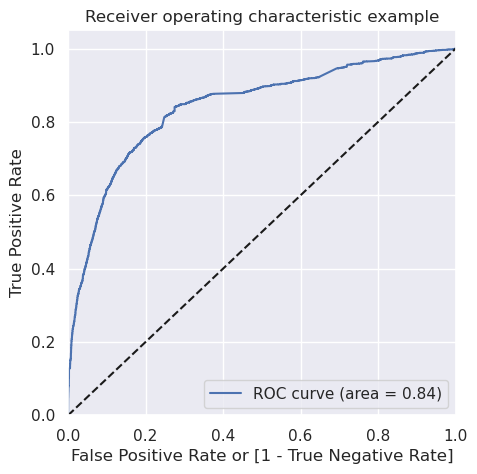

In [165]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

fpr, tpr, thresholds = roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [166]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.7767462422634837

0.6370558375634517

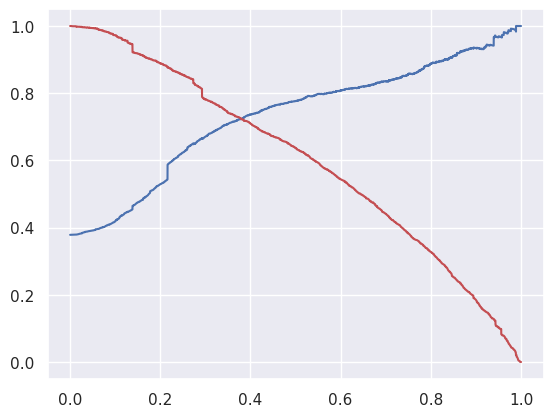

In [167]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

####  ----------------------------------------------------------------------